# Decision tree

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn import tree
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay


In [2]:
df = pd.read_csv("../Data/adjusted_data.csv", sep=';')

In [3]:
X = df.drop("Target", axis=1)

# List of columns to scale
cols_to_scale = [
    'Application order',
    'Daytime/evening attendance\t',
    'Previous qualification (grade)',
    'Admission grade',
    'Age at enrollment',
    'Curricular units 1st sem (credited)',
    'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)',
    'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)',
    'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)',
    'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)',
    'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)',
    'Curricular units 2nd sem (without evaluations)',
    'Unemployment rate',
    'Inflation rate',
    'GDP'
]

scaler = RobustScaler()
X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])
# Specify which columns to one-hot encode
cols_to_encode = [
    'Previous qualification',
    'Mother\'s qualification', 
    'Father\'s qualification', 
    'Mother\'s occupation', 
    'Father\'s occupation', 
    'Course', 
    'Marital status'
]

# Create a column transformer that applies OneHotEncoder to specified columns
# and passes through the rest unchanged
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), cols_to_encode)
    ],
    remainder='passthrough'
)

preprocessor.fit(X)
X = preprocessor.transform(X)
X = pd.DataFrame(X, columns=preprocessor.get_feature_names_out())

#print(X.head())
# Use a 1D target array (LogisticRegression expects y to be 1D for multiclass)
y = df["Target"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



In [4]:
depth = []
for i in range(3,20):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    # Perform 7-fold cross validation 
    scores = cross_val_score(estimator=clf, X=X, y=y, cv=7, n_jobs=4)
    depth.append((i,scores.mean()))
print(depth)

[(3, np.float64(0.7344032549728753)), (4, np.float64(0.7459312839059675)), (5, np.float64(0.7486437613019891)), (6, np.float64(0.751130198915009)), (7, np.float64(0.7477396021699819)), (8, np.float64(0.7371157323688969)), (9, np.float64(0.7321428571428571)), (10, np.float64(0.7258137432188064)), (11, np.float64(0.7249095840867993)), (12, np.float64(0.7167721518987342)), (13, np.float64(0.7122513562386981)), (14, np.float64(0.7018535262206147)), (15, np.float64(0.6980108499095842)), (16, np.float64(0.696880650994575)), (17, np.float64(0.6891952983725135)), (18, np.float64(0.6869349005424955)), (19, np.float64(0.68874321880651))]


In [5]:
accuracies_test = []
accuracies_train = []
max_acc = 0
for i in range(1,40):
    clf = tree.DecisionTreeClassifier(max_depth=i, random_state=42, min_samples_leaf=4)
    clf = clf.fit(x_train, y_train)
    acc_test = accuracy_score(clf.predict(x_test), y_test)
    accuracies_test.append(acc_test)
    print(f'Depht = {i} and accuracy = {acc_test}')
    if acc_test > max_acc:
        max_acc = acc_test
        depth = i 
    acc_train = accuracy_score(clf.predict(x_train), y_train)
    accuracies_train.append(acc_train)

print(f'Best acc = {max_acc} with depth = {depth}')

Depht = 1 and accuracy = 0.7062146892655368
Depht = 2 and accuracy = 0.7163841807909604
Depht = 3 and accuracy = 0.7333333333333333
Depht = 4 and accuracy = 0.735593220338983
Depht = 5 and accuracy = 0.7559322033898305
Depht = 6 and accuracy = 0.7310734463276836
Depht = 7 and accuracy = 0.7288135593220338
Depht = 8 and accuracy = 0.7220338983050848
Depht = 9 and accuracy = 0.7242937853107345
Depht = 10 and accuracy = 0.7062146892655368
Depht = 11 and accuracy = 0.7005649717514124
Depht = 12 and accuracy = 0.7084745762711865
Depht = 13 and accuracy = 0.6937853107344633
Depht = 14 and accuracy = 0.6926553672316385
Depht = 15 and accuracy = 0.6949152542372882
Depht = 16 and accuracy = 0.6949152542372882
Depht = 17 and accuracy = 0.6903954802259887
Depht = 18 and accuracy = 0.6915254237288135
Depht = 19 and accuracy = 0.688135593220339
Depht = 20 and accuracy = 0.6892655367231638
Depht = 21 and accuracy = 0.6892655367231638
Depht = 22 and accuracy = 0.6892655367231638
Depht = 23 and accura

In [6]:
for i in range(len(accuracies_test)):
    print(f'depth = {i+1} Test accuracy = {accuracies_test[i]} and train accuracy = {accuracies_train[i]}')

depth = 1 Test accuracy = 0.7062146892655368 and train accuracy = 0.705283978525007
depth = 2 Test accuracy = 0.7163841807909604 and train accuracy = 0.7143260808137892
depth = 3 Test accuracy = 0.7333333333333333 and train accuracy = 0.7406046905905623
depth = 4 Test accuracy = 0.735593220338983 and train accuracy = 0.7496467928793444
depth = 5 Test accuracy = 0.7559322033898305 and train accuracy = 0.7742300084769709
depth = 6 Test accuracy = 0.7310734463276836 and train accuracy = 0.7855326363379486
depth = 7 Test accuracy = 0.7288135593220338 and train accuracy = 0.8112461147216727
depth = 8 Test accuracy = 0.7220338983050848 and train accuracy = 0.829895450692286
depth = 9 Test accuracy = 0.7242937853107345 and train accuracy = 0.8488273523594235
depth = 10 Test accuracy = 0.7062146892655368 and train accuracy = 0.8601299802204012
depth = 11 Test accuracy = 0.7005649717514124 and train accuracy = 0.8700197795987568
depth = 12 Test accuracy = 0.7084745762711865 and train accuracy =

## More testing

In [7]:

max_depth = [3, 4, 5, 6, 7, 8]
max_leaves = [10, 15, 20, 25, 30, 35, 40]

n = len(max_depth)
m = len(max_leaves)

train_accs = np.zeros((n,m))
test_accs = np.zeros((n,m))

for i in range(n):
    for j in range(m):
        clf = tree.DecisionTreeClassifier(max_depth=max_depth[i], random_state=42, max_leaf_nodes=max_leaves[j])
        clf = clf.fit(x_train, y_train)
        train_acc = accuracy_score(clf.predict(x_train), y_train)
        test_acc = accuracy_score(clf.predict(x_test), y_test)
        train_accs[i,j]= train_acc
        test_accs[i,j] = test_acc



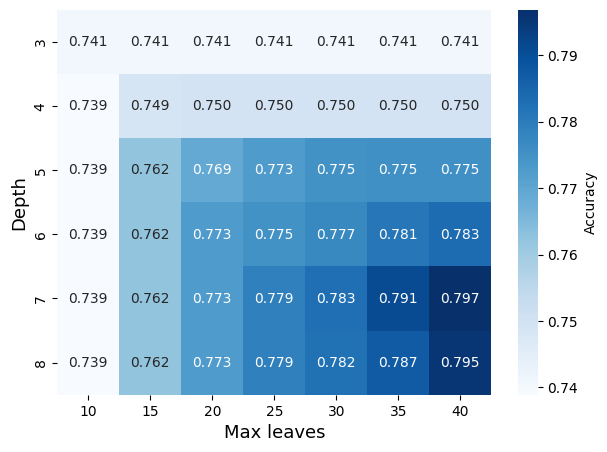

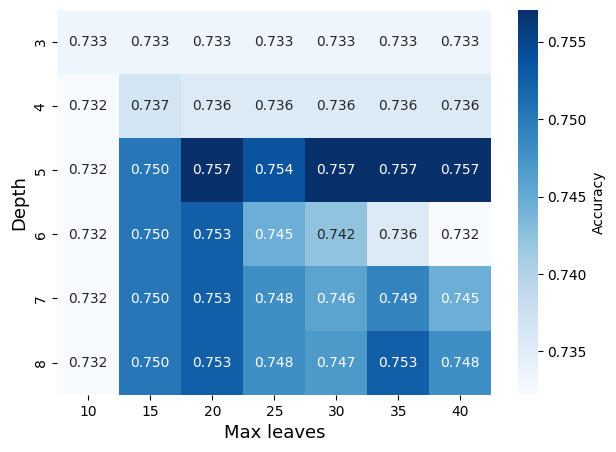

In [8]:
import seaborn as sns
plt.figure(figsize=(7,5))
ax = sns.heatmap( train_accs, cmap='Blues', annot=True, fmt='.3f',
                 xticklabels=max_leaves, yticklabels=max_depth, cbar=True, cbar_kws={'label':'Accuracy'} )
# ax.set_title("Training Accuracy")
ax.set_xlabel("Max leaves", fontsize=13)
ax.set_ylabel("Depth", fontsize=13)
plt.savefig('../Figures/tree_train_acc_leaves.png', dpi=300, bbox_inches='tight')

plt.show()

plt.figure(figsize=(7,5))
ax = sns.heatmap(test_accs, cmap='Blues', annot=True, fmt='.3f',
                 xticklabels=max_leaves, yticklabels=max_depth, cbar=True, cbar_kws={'label':'Accuracy'} )
# ax.set_title("Test Accuracy")
ax.set_xlabel("Max leaves", fontsize=13)
ax.set_ylabel("Depth", fontsize=13)
plt.savefig('../Figures/tree_test_acc_leaves.png', dpi=300, bbox_inches='tight')
plt.show()

## Plot best tree

In [9]:
clf = tree.DecisionTreeClassifier(max_depth=5, random_state=42, max_leaf_nodes=20)
clf = clf.fit(x_train, y_train)

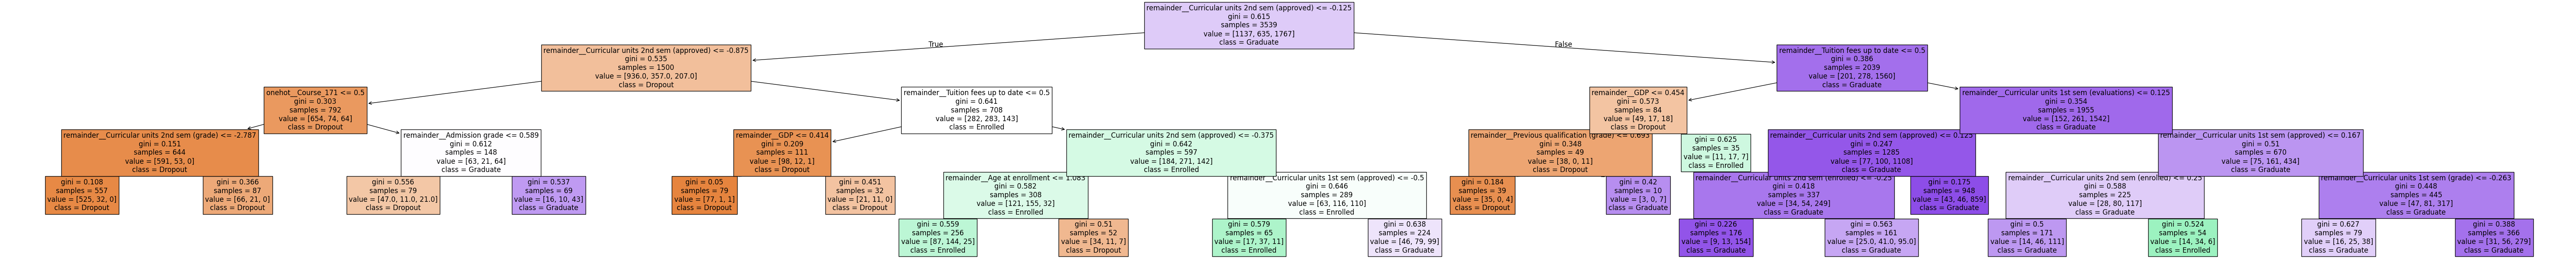

In [10]:
target_names = [str(c) for c in clf.classes_]
feature_names = X.columns
target_names = clf.classes_.astype(str)  # clf is the DecisionTreeClassifier

plt.figure(figsize=(80, 8))
tree.plot_tree(
    clf,
    filled=True,
    feature_names=feature_names,
    class_names=target_names,
    fontsize=12
)
# plt.title('Decision Tree Visualization')
plt.savefig('../Figures/tree_vis_5.png', dpi=400, bbox_inches='tight')
plt.show()

In [11]:
accuracy_score(clf.predict(x_test), y_test)

0.7570621468926554

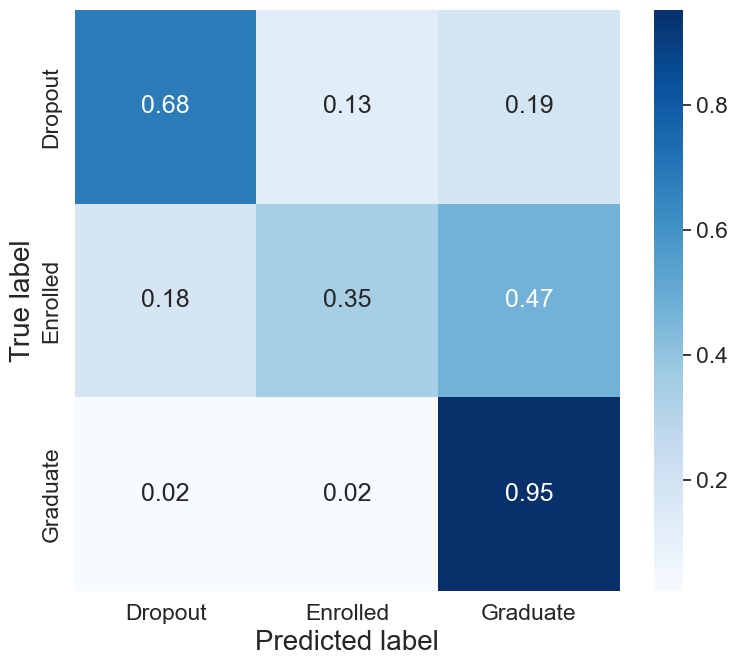

In [12]:
class_names = clf.classes_  

y_pred = clf.predict(x_test)


cm_counts = confusion_matrix(y_test, y_pred, labels=class_names)

cm_norm = confusion_matrix(y_test, y_pred, labels=class_names, normalize='true')


sns.set(font_scale=1.5)
plt.figure(figsize=(8, 7))
sns.heatmap(pd.DataFrame(cm_norm, index=class_names, columns=class_names), annot=True, fmt=".2f", cmap="Blues",
            xticklabels=target_names,
            yticklabels=target_names)
plt.xlabel("Predicted label", fontsize=20)
plt.ylabel("True label", fontsize=20)
plt.tight_layout()
plt.savefig('../Figures/tree_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

### Importance of features

remainder__Curricular units 2nd sem (approved): 0.72359
remainder__Tuition fees up to date: 0.09443
onehot__Course_171: 0.05200
remainder__Curricular units 1st sem (evaluations): 0.03303
remainder__Curricular units 2nd sem (enrolled): 0.02896
remainder__Curricular units 1st sem (approved): 0.01633
remainder__GDP: 0.01396
remainder__Age at enrollment: 0.00963
remainder__Admission grade: 0.00955
remainder__Curricular units 1st sem (grade): 0.00777
remainder__Previous qualification (grade): 0.00567
remainder__Curricular units 2nd sem (grade): 0.00508
onehot__Previous qualification_Basic Education: 0.00000
onehot__Previous qualification_Higher Education: 0.00000
onehot__Previous qualification_Higher Education - Master or Doctorate: 0.00000
onehot__Previous qualification_Higher Technical Course: 0.00000
onehot__Previous qualification_Incomplete Basic Education: 0.00000
onehot__Previous qualification_Technological Specialization Course: 0.00000
onehot__Mother's qualification_Basic Education:

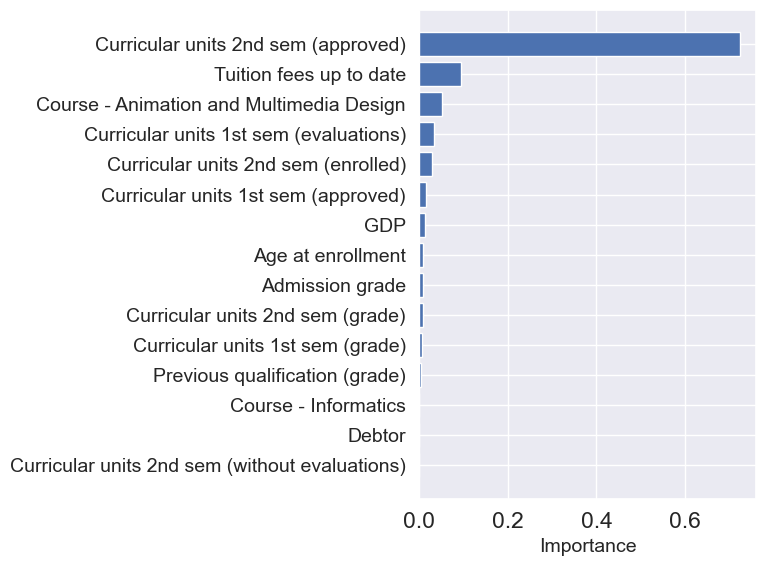

In [13]:
importances = clf.feature_importances_
feature_names = X.columns

for name, val in sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True):
    print(f"{name}: {val:.5f}")

# Indices of the top 15 features (handle cases with <15 features)
k = min(15, len(importances))
top_idx = np.argsort(importances)[-k:][::-1]  # highest to lowest

important_features_15 = ['Curricular units 2nd sem (approved)',
                         'Tuition fees up to date',
                         'Course - Animation and Multimedia Design',
                         'Curricular units 1st sem (evaluations)',
                         'Curricular units 2nd sem (enrolled)',
                         'Curricular units 1st sem (approved)',
                         'GDP',
                         'Age at enrollment',
                         'Admission grade',
                         'Curricular units 2nd sem (grade)',
                         'Curricular units 1st sem (grade)',
                         'Previous qualification (grade)',
                         'Course - Informatics',                         
                         'Debtor',
                         'Curricular units 2nd sem (without evaluations)']

# Summarize feature importance
plt.figure(figsize=(8, 6))
plt.barh(range(k), importances[top_idx])
plt.yticks(range(k), np.array(important_features_15), fontsize=14)
plt.xlabel("Importance", fontsize=14)
# plt.title(f"Top {k} Feature Importances")
plt.gca().invert_yaxis()  # so the highest importance appears at the top
plt.tight_layout()
plt.savefig('../Figures/tree_importance_top15_5.png', dpi=400, bbox_inches='tight')
plt.show()

## Smaller, but interpretable tree

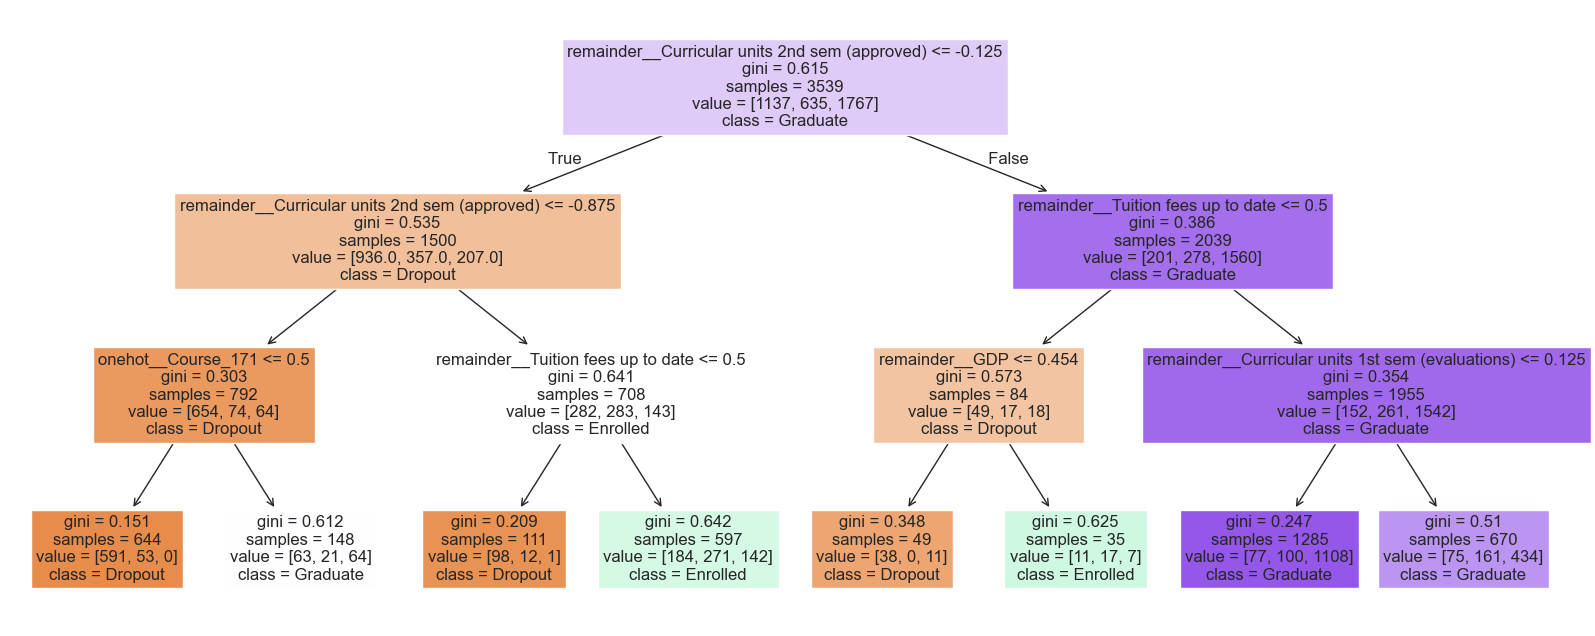

In [14]:
clf = tree.DecisionTreeClassifier(max_depth=3, random_state=42)
clf = clf.fit(x_train, y_train)
target_names = [str(c) for c in clf.classes_]
feature_names = X.columns
target_names = clf.classes_.astype(str)  # clf is the DecisionTreeClassifier

plt.figure(figsize=(20, 8))
tree.plot_tree(
    clf,
    filled=True,
    feature_names=feature_names,
    class_names=target_names,
    fontsize=12
)
# plt.title('Decision Tree Visualization')
plt.savefig('../Figures/tree_vis_3.png', dpi=400, bbox_inches='tight')
plt.show()

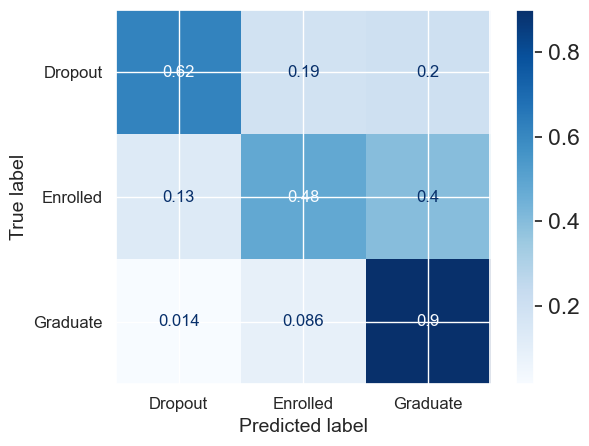

In [15]:
cmp = ConfusionMatrixDisplay.from_estimator(clf, x_test, y_test, cmap="Blues", normalize='true',     include_values=True)
# plt.title("Confusion Matrix")
# fig, ax = 


# Access the axes
ax = cmp.ax_

# Axes labels and title
ax.set_xlabel("Predicted label", fontsize=14)
ax.set_ylabel("True label", fontsize=14)

# Tick label sizes
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Annotation font sizes: use Matplotlib's text artists on the axes
for t in ax.texts:
    t.set_fontsize(12)


plt.tight_layout()
plt.savefig('../Figures/tree_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()